## Imports

In [143]:
import re

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [66]:
COFFEE_SHOP_DATA = "../data/Coffee_shop_data.xlsx"
POPULATION_DATA = "../data/population.csv"

## Data injection & Analysis

In [67]:
coffee_df = pd.read_excel(COFFEE_SHOP_DATA)
population_df = pd.read_csv(POPULATION_DATA, skiprows=[0])

In [68]:
coffee_df.sample(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
41,42,Fresh & Frothy,7585 Park Meadow Way,Oakland,California,94605,510-523-1038,4.30,Male,81656,5.20880
770,771,Sip & Stories,8 Oriole Way,Long Beach,California,90831,562-226-8513,4.33,Male,76580,4.42900
61,62,Bean Boutique,63 Northridge Lane,San Diego,California,92137,619-790-3121,2.00,Male,82349,4.78945
955,956,Mugful Magic,23 Hooker Junction,San Francisco,California,94177,415-221-9442,1.50,Male,88503,5.74915
886,887,Cup of Comfort,13 Armistice Way,Sacramento,California,95865,916-557-5603,4.37,Female,74852,4.66860
369,370,Caffeine Communion,670 Pearson Terrace,Fresno,California,93709,559-758-2352,4.46,Female,76033,4.57765
983,984,Steamy Moments,86 Northland Park,San Jose,California,95150,408-978-6232,4.48,Female,88036,5.15580
703,704,The Roast Refinery,7232 Sullivan Street,Mountain View,California,94042,650-264-8557,1.56,Male,75624,4.67320
688,689,The Roast Refinery,2894 Lukken Center,Sacramento,California,95833,530-840-3350,4.50,Female,81317,5.28585
439,440,Frothy Fusion,4 Melody Place,Sacramento,California,94297,916-539-0592,4.18,Female,87000,5.27800


In [69]:
population_df.sample(10)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
935,8600000US94074,ZCTA5 94074,1,Total population,81,NaN,24,29,5,10,8,2,3
1380,8600000US95552,ZCTA5 95552,1,Total population,333,NaN,120,130,43,23,10,6,1
1375,8600000US95547,ZCTA5 95547,1,Total population,477,NaN,100,198,74,65,22,7,11
32,8600000US90029,ZCTA5 90029,1,Total population,13883,NaN,4205,3553,2232,1845,1095,515,438
856,8600000US93656,ZCTA5 93656,1,Total population,1714,NaN,223,348,279,302,291,130,141
1154,8600000US95065,ZCTA5 95065,1,Total population,3198,NaN,879,1078,507,424,183,83,44
784,8600000US93519,ZCTA5 93519,1,Total population,50,NaN,20,20,6,1,2,0,1
284,8600000US91763,ZCTA5 91763,1,Total population,9450,NaN,1226,1835,1553,1724,1385,752,975
1076,8600000US94705,ZCTA5 94705,1,Total population,5718,NaN,1965,2029,829,600,212,52,31
243,8600000US91436,ZCTA5 91436,1,Total population,5552,NaN,1177,2056,909,945,336,101,28


In [70]:
## Calculating number of instances in each data frame

print(f"Coffee df has {coffee_df.shape[0]} rows and {coffee_df.shape[1]} columns")
print(f"Population df has {population_df.shape[0]} rows and {population_df.shape[1]} columns")

Coffee df has 1000 rows and 11 columns
Population df has 1705 rows and 13 columns


In [71]:
## Checking the column names of each data frame

coffee_df.columns

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price'],
      dtype='object')

In [72]:
population_df.columns

Index(['Geography', 'Label for GEO_ID', 'Race/Ethnic Group',
       'Population Groups', 'Total', 'Errata of Total',
       'Total!!1-person household', 'Total!!2-person household',
       'Total!!3-person household', 'Total!!4-person household',
       'Total!!5-person household', 'Total!!6-person household',
       'Total!!7-or-more-person household'],
      dtype='object')

In [73]:
## Overview of the data

coffee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID no.           1000 non-null   int64  
 1   Business Name    1000 non-null   object 
 2   Street address   1000 non-null   object 
 3   City             1000 non-null   object 
 4   State            1000 non-null   object 
 5   Zip Code         1000 non-null   int64  
 6   Phone            1000 non-null   object 
 7   Rating           1000 non-null   float64
 8   Gender majority  1000 non-null   object 
 9   Median Salary    1000 non-null   int64  
 10  Latte Price      1000 non-null   float64
dtypes: float64(2), int64(3), object(6)
memory usage: 86.1+ KB


In [74]:
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705 entries, 0 to 1704
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Geography                          1705 non-null   object 
 1   Label for GEO_ID                   1705 non-null   object 
 2   Race/Ethnic Group                  1705 non-null   int64  
 3   Population Groups                  1705 non-null   object 
 4   Total                              1705 non-null   int64  
 5   Errata of Total                    0 non-null      float64
 6   Total!!1-person household          1705 non-null   int64  
 7   Total!!2-person household          1705 non-null   int64  
 8   Total!!3-person household          1705 non-null   int64  
 9   Total!!4-person household          1705 non-null   int64  
 10  Total!!5-person household          1705 non-null   int64  
 11  Total!!6-person household          1705 non-null   int64

- 'Errate of total' has 0 non-null values

In [75]:
## Statistical summary

In [76]:
coffee_df.describe()

,ID no.,Zip Code,Rating,Median Salary,Latte Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,92976.163000,3.784600,81182.842000,5.061491
std,288.819436,1706.943177,1.150717,5142.670356,0.352002
min,1.000000,90005.000000,1.000000,72001.000000,3.090000
25%,250.750000,91751.750000,3.200000,76776.000000,4.830175
50%,500.500000,92883.000000,4.240000,81113.000000,5.062450
75%,750.250000,94257.000000,4.580000,85684.000000,5.310025
max,1000.000000,96154.000000,5.000000,89978.000000,6.480000


 - Avg. Latte price is \$5.06
 - Cheapest latte is \\$3.09 and costliest is \\$6.48
 - Coffee shops have an avg rating of 3.78

In [77]:
population_df.describe()

,Race/Ethnic Group,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
count,1705.0,1705.000000,0.0,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000,1705.000000
mean,1.0,7380.679179,NaN,1719.078592,2144.630499,1199.246921,1105.011144,610.421114,297.739589,304.551320
std,0.0,6834.537992,NaN,1883.978056,1996.729629,1155.478884,1119.177945,694.102841,388.344813,515.173094
min,1.0,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,766.000000,NaN,188.000000,275.000000,105.000000,78.000000,42.000000,18.000000,11.000000
50%,1.0,5898.000000,NaN,1159.000000,1708.000000,932.000000,787.000000,369.000000,139.000000,86.000000
75%,1.0,12614.000000,NaN,2685.000000,3591.000000,2015.000000,1838.000000,968.000000,437.000000,377.000000
max,1.0,33342.000000,NaN,19444.000000,9845.000000,5563.000000,5604.000000,4118.000000,2491.000000,4467.000000


- Avg population is 7380M
- minimum population is 0.. thats interesting
- maximum population is 33342M
- Avg. population:
    - 1 person household = 1819M
    - 2 person household = 2144M
    - 3 person household = 1199M
    - 4 person household = 1105M
    - 5 person household = 610M
    - 6 person household = 297M
    - 7 person household = 304M
- There is high degree of variability within the dataset

In [78]:
coffee_df.sample(10)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
690,691,Brewed Dreamscape,837 Mifflin Road,Santa Barbara,California,93150,805-401-0162,1.74,Female,72001,4.67005
382,383,Urban Brewtropolis,797 American Plaza,Los Angeles,California,90020,323-655-7096,4.10,Female,82047,5.17035
104,105,Frothy Delights,484 Mallory Circle,Orange,California,92867,714-419-8002,4.50,Female,74340,5.04700
143,144,The Roastery,8 Ludington Court,Sacramento,California,95828,916-334-0283,4.00,Male,83453,4.96665
571,572,Cup of Comfort,9 Burrows Circle,South Lake Tahoe,California,96154,530-887-5004,1.73,Female,88458,5.21290
842,843,Latte Landmark,8494 Pearson Pass,Corona,California,92878,951-376-9018,4.59,Female,80359,4.79195
418,419,The Roast Refinery,609 Sunfield Point,Garden Grove,California,92844,310-827-5399,4.95,Female,80480,5.14000
735,736,Brewed Dreamscape,83 Heath Park,Pasadena,California,91125,626-812-5201,4.28,Female,89065,5.12925
142,143,Mugful Moments,6176 Debra Park,Garden Grove,California,92844,714-461-1301,4.75,Male,80480,4.68400
129,130,Perk Up Plaza,836 Crest Line Avenue,Los Angeles,California,90055,213-656-3472,1.67,Female,81567,4.82235


In [79]:
coffee_df['State'].value_counts()

State
California    1000
Name: count, dtype: int64

All the coffee shops are in the state california

In [80]:
len(coffee_df['City'].value_counts())

64

The California coffee shop dataset encompasses information from 64 cities across the state.

Text(0.5, 1.0, 'Top 10 Cities with most coffee shops')

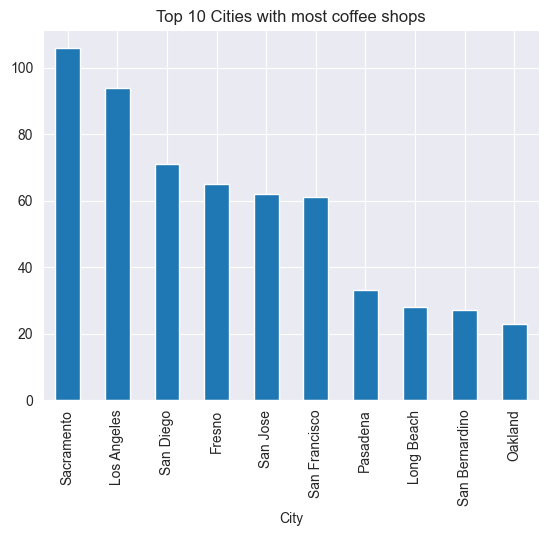

In [81]:
ax = coffee_df['City'].value_counts().head(10).plot(kind='bar')
ax.set_title("Top 10 Cities with most coffee shops")

In [82]:
coffee_df.sort_values(by="Latte Price", ascending=False).head(10)[['Business Name','City','Latte Price']]

,Business Name,City,Latte Price
995,Sip & Stories,San Bernardino,6.48000
367,Urban Brewtropolis,Palo Alto,5.87770
463,The Roast Refinery,Santa Clara,5.85815
417,Coffee Coziness,Palo Alto,5.81570
938,Steamy Moments,Long Beach,5.81020
97,Brewed Beauty,Long Beach,5.79420
736,Cup of Comfort,Pasadena,5.79105
486,Perk Paradise,Corona,5.77675
188,Mug Magic,Santa Cruz,5.77595
661,Cup of Comfort,Corona,5.77075


These are the top 10 costiliest lattes

In [83]:
coffee_df['Gender majority'].value_counts()

Gender majority
Male      511
Female    489
Name: count, dtype: int64

<Axes: xlabel='Gender majority', ylabel='count'>

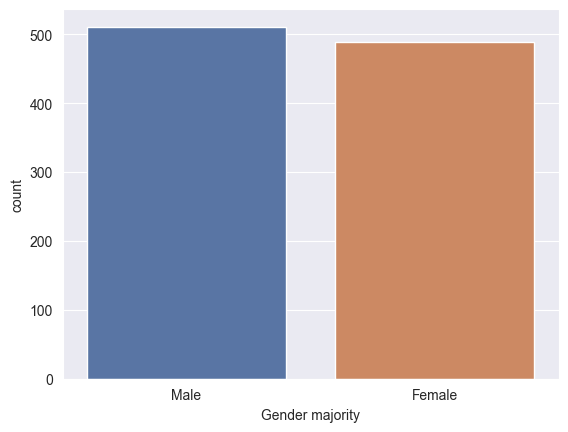

In [84]:
sns.set_style('darkgrid')
sns.countplot(data=coffee_df, x="Gender majority", palette="deep")


In [85]:
population_df.sample(5)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
932,8600000US94065,ZCTA5 94065,1,Total population,4745,NaN,1324,1592,844,724,188,52,21
1138,8600000US95032,ZCTA5 95032,1,Total population,10147,NaN,2746,3427,1663,1563,556,136,56
1397,8600000US95573,ZCTA5 95573,1,Total population,831,NaN,292,338,99,59,32,6,5
45,8600000US90043,ZCTA5 90043,1,Total population,16075,NaN,4664,4210,2669,2068,1159,646,659
1537,8600000US95916,ZCTA5 95916,1,Total population,661,NaN,213,280,81,45,22,10,10


In [86]:
population_df.sort_values(by="Total",ascending=False)[:10]

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
947,8600000US94109,ZCTA5 94109,1,Total population,33342,NaN,19444,9845,2373,1064,356,149,111
85,8600000US90250,ZCTA5 90250,1,Total population,31087,NaN,7513,7533,5563,4695,2978,1466,1339
48,8600000US90046,ZCTA5 90046,1,Total population,28534,NaN,14976,9648,2413,1088,284,81,44
132,8600000US90650,ZCTA5 90650,1,Total population,27130,NaN,3417,5446,4462,4904,3713,2231,2957
948,8600000US94110,ZCTA5 94110,1,Total population,27128,NaN,8588,8617,4395,2778,1210,665,875
592,8600000US92683,ZCTA5 92683,1,Total population,26223,NaN,4296,6528,4495,4547,2781,1632,1944
307,8600000US91910,ZCTA5 91910,1,Total population,26063,NaN,6085,6938,4652,4302,2314,997,775
160,8600000US90805,ZCTA5 90805,1,Total population,26056,NaN,4559,5097,4555,4346,3310,1892,2297
1029,8600000US94565,ZCTA5 94565,1,Total population,25761,NaN,4471,6403,4638,4333,2857,1568,1491
36,8600000US90034,ZCTA5 90034,1,Total population,25592,NaN,9371,8355,3708,2357,1035,429,337


## Data Preprocessing

In [87]:
coffee_df.isnull().sum()

ID no.             0
Business Name      0
Street address     0
City               0
State              0
Zip Code           0
Phone              0
Rating             0
Gender majority    0
Median Salary      0
Latte Price        0
dtype: int64

No null values in any columns

In [88]:
coffee_df.sample(3)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price
643,644,The Roast Refinery,793 Oakridge Terrace,Pasadena,California,91103,626-463-8536,4.73,Female,89781,5.12105
768,769,Java Joyhouse,98333 Tomscot Pass,San Jose,California,95194,408-667-2090,3.33,Male,84762,5.27210
785,786,Sip & Stories,89278 Sheridan Park,San Francisco,California,94159,415-630-2772,3.82,Female,84781,5.19705


In [89]:
coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)

In [90]:
population_df.sample(3)

,Geography,Label for GEO_ID,Race/Ethnic Group,Population Groups,Total,Errata of Total,Total!!1-person household,Total!!2-person household,Total!!3-person household,Total!!4-person household,Total!!5-person household,Total!!6-person household,Total!!7-or-more-person household
1293,8600000US95391,ZCTA5 95391,1,Total population,2891,NaN,315,648,544,711,370,187,116
338,8600000US92024,ZCTA5 92024,1,Total population,19649,NaN,5099,7003,3243,2801,961,312,230
127,8600000US90623,ZCTA5 90623,1,Total population,5072,NaN,713,1454,1006,1077,521,199,102


In [91]:
## This function finds the last 5 digits from the string
def find_zip_code(geocode):
    pattern = r'\d{5}$'
    
    match = re.search(pattern, geocode)
    
    if match:
        zip_code = match.group(0)
    
    return zip_code
    

In [92]:
## New feature 'Zip Code' using geography feature and extracting last 5 digits
population_df['Zip Code'] = population_df['Geography'].apply(find_zip_code)

In [93]:
cafe_data = coffee_df.copy()

In [94]:
coffee_df = pd.merge(cafe_data, population_df)

In [95]:
coffee_df.columns

Index(['ID no.', 'Business Name', 'Street address', 'City', 'State',
       'Zip Code', 'Phone', 'Rating', 'Gender majority', 'Median Salary',
       'Latte Price', 'Geography', 'Label for GEO_ID', 'Race/Ethnic Group',
       'Population Groups', 'Total', 'Errata of Total',
       'Total!!1-person household', 'Total!!2-person household',
       'Total!!3-person household', 'Total!!4-person household',
       'Total!!5-person household', 'Total!!6-person household',
       'Total!!7-or-more-person household'],
      dtype='object')

In [96]:
coffee_df.shape

(412, 24)

In [97]:
columns = cafe_data.columns.values.tolist()+['Total']
columns

['ID no.',
 'Business Name',
 'Street address',
 'City',
 'State',
 'Zip Code',
 'Phone',
 'Rating',
 'Gender majority',
 'Median Salary',
 'Latte Price',
 'Total']

In [98]:
coffee_df = coffee_df[columns]

In [99]:
coffee_df = coffee_df.rename(columns={"Total": "Population"})

In [100]:
coffee_df.sample(5)

,ID no.,Business Name,Street address,City,State,Zip Code,Phone,Rating,Gender majority,Median Salary,Latte Price,Population
266,640,Caffeine Communion,11 Bartillon Alley,North Hollywood,California,91606,818-212-0041,4.82,Female,73193,4.91965,14903
79,190,Bean Boulevard,442 Thackeray Alley,San Jose,California,95123,408-715-2575,4.80,Female,80356,4.95180,21123
140,331,Mug Muse,9 Coolidge Terrace,Hayward,California,94544,510-679-6958,4.24,Male,72092,4.91660,21872
68,166,Aroma Alcove,39202 3rd Center,Oceanside,California,92056,760-738-2243,4.66,Female,77003,5.11215,19175
298,696,Sip & Stories,15 Glacier Hill Alley,San Diego,California,92127,858-293-6802,1.53,Female,84283,5.51215,13019


In [101]:
coffee_df = coffee_df[['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population']]

In [102]:
coffee_df.shape

(412, 5)

In [103]:
coffee_shop_counts = coffee_df['Zip Code'].value_counts().reset_index()
coffee_shop_counts.sample(4)

,Zip Code,count
24,90010,6
44,92405,5
11,93721,8
61,95973,3


In [104]:
# coffee_df['Zip Code'] = coffee_df['Zip Code'].astype(str)
# coffee_shop_counts['Zip Code'] = coffee_shop_counts['Zip Code'].astype(str)

In [105]:
coffee_df = coffee_df.merge(coffee_shop_counts, on='Zip Code', how="left")

In [106]:
coffee_df.sample(10)

,Zip Code,Rating,Median Salary,Latte Price,Population,count
264,92410,3.25,77543,4.50315,12838,10
153,90505,2.07,76315,4.50375,14244,10
262,92883,4.72,89655,5.15475,9163,7
306,90020,4.00,82047,4.89235,16514,7
317,91606,4.53,73193,4.77565,14903,6
234,95113,4.82,75808,4.94840,575,8
326,91913,2.30,74094,4.85670,12133,8
356,92505,4.87,89573,5.71865,13754,9
183,90035,4.87,87604,5.06620,12814,5
346,91205,4.59,81057,5.00485,14089,5


Criteria:<br>
a. High Population <br>
b. Low total number of coffee shops <br>
c. Low rating <br>
d. high median salary <br>

In [107]:
coffee_df = coffee_df.rename(columns={"count":"CoffeeShopCount"})

In [108]:
sorted_df = coffee_df.sort_values(by=["Population","CoffeeShopCount","Rating", "Median Salary"], 
                                  ascending=[False,True,True,False]).reset_index(drop=True)

In [109]:
sorted_df.head(10)

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
0,94110,2.22,74020,5.04500,27128,5
1,94110,3.50,74020,5.04700,27128,5
2,94110,4.40,74020,5.05900,27128,5
3,94110,4.50,74020,4.77900,27128,5
4,94110,4.70,74020,4.58100,27128,5
5,90805,3.00,88140,5.47900,26056,4
6,90805,3.89,88140,5.31900,26056,4
7,90805,4.31,88140,5.02100,26056,4
8,90805,4.37,88140,5.20700,26056,4
9,95823,4.30,73165,4.96825,22470,3


In [110]:
lst = []

for i in range(len(sorted_df)):
    if len(lst) !=5:
        if (sorted_df['Zip Code'][i] not in lst ):
            lst.append(sorted_df['Zip Code'][i])
            
lst

['94110', '90805', '95823', '94544', '90025']

In [111]:
top_5_zip_codes_df = sorted_df[sorted_df['Zip Code'].isin(lst)]

top_5_zip_codes_df

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
0,94110,2.22,74020,5.04500,27128,5
1,94110,3.50,74020,5.04700,27128,5
2,94110,4.40,74020,5.05900,27128,5
3,94110,4.50,74020,4.77900,27128,5
4,94110,4.70,74020,4.58100,27128,5
5,90805,3.00,88140,5.47900,26056,4
6,90805,3.89,88140,5.31900,26056,4
7,90805,4.31,88140,5.02100,26056,4
8,90805,4.37,88140,5.20700,26056,4
9,95823,4.30,73165,4.96825,22470,3


## Model Training

In [112]:
coffee_df.columns

Index(['Zip Code', 'Rating', 'Median Salary', 'Latte Price', 'Population',
       'CoffeeShopCount'],
      dtype='object')

In [113]:
coffee_df.sample(3)

,Zip Code,Rating,Median Salary,Latte Price,Population,CoffeeShopCount
104,93305,4.50,82664,5.1812,10713,4
231,90805,4.37,88140,5.2070,26056,4
9,94110,4.70,74020,4.5810,27128,5


In [114]:
X = coffee_df.drop(['Latte Price','Zip Code'], axis=1)
y = coffee_df['Latte Price']

In [115]:
X.shape

(412, 4)

In [116]:
y.shape

(412,)

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
X_train.shape

(329, 4)

In [119]:
y_train.shape

(329,)

### Scale

In [120]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Training and Evaluating Models

In [132]:
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    KNeighborsRegressor(),
    XGBRegressor()
]

model_names = [
    "Linear Regression",
    "Multiple Linear Regression (Ridge)",
    "Lasso Regression",
    "Decision Tree Regressor",
    "Random Forest Regressor",
    "K-Nearest Neighbors Regressor",
    "XGBoost Regressor"
]

In [144]:
results = []
# print(zip(model_names,models))
for model_name, model in zip(model_names, models):
    
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    result = {
        "model_name": model_name,
        "Mean Squared Error": mse,
        "Mean Absolute Error":mae,
        "R-Squared": r2
    }

    results.append(result)

In [145]:
results_df = pd.DataFrame(results)
results_df.to_csv('results')

In [164]:
# Define hyperparameter grids for each model
param_grid_linear_reg = {
      'fit_intercept': [True, False]
  }
param_grid_ridge_reg = {
      'alpha': [0.1, 1.0, 10.0]
  }
param_grid_lasso_reg = {
      'alpha': [0.1, 1.0, 10.0]
  }
param_grid_decision_tree = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
param_grid_random_forest = { 
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9], 
} 
param_grid_knn = {
      'n_neighbors': [3, 5, 10],
      'metric': ['euclidean', 'manhattan', 'minkowski']
  }
param_grid_xgboost = {
      'learning_rate': [0.05, 0.1, 0.3],
      'max_depth': [3, 5, 8],
      'min_child_weight': [1, 3, 5],
      'subsample': [0.5, 0.7, 1.0]
  }

parameters = [param_grid_linear_reg, param_grid_ridge_reg,param_grid_lasso_reg,param_grid_decision_tree,param_grid_random_forest,
             param_grid_knn,param_grid_xgboost ]


In [168]:
best_estimators = {}
tuning_results = []


for model_name, model, param in zip(model_names, models, parameters ):
    print(f"{model_name} in process..")
    grid_search = GridSearchCV(model, param, scoring='r2', cv=5)
    grid_search.fit(X_train, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results in a dictionary
    result = {
        "model_name": model_name,
        "Mean Squared Error": mse,
        "Mean Absolute Error":mae,
        "R-Squared": r2
    }

    tuning_results.append(result)
    
    
tuning_results_df = pd.DataFrame(tuning_results)
tuning_results_df

Linear Regression in process..
Multiple Linear Regression (Ridge) in process..
Lasso Regression in process..
Decision Tree Regressor in process..
Random Forest Regressor in process..
K-Nearest Neighbors Regressor in process..
XGBoost Regressor in process..


,model_name,Mean Squared Error,Mean Absolute Error,R-Squared
0,Linear Regression,0.065259,0.222095,0.448140
1,Multiple Linear Regression (Ridge),0.065265,0.222064,0.448085
2,Lasso Regression,0.119083,0.283824,-0.007018
3,Decision Tree Regressor,0.103658,0.272996,0.123416
4,Random Forest Regressor,0.071914,0.231381,0.391864
5,K-Nearest Neighbors Regressor,0.075162,0.232928,0.364393
6,XGBoost Regressor,0.085790,0.249227,0.274520


In [170]:
tuning_results_df.sort_values(by="R-Squared", ascending=False)

,model_name,Mean Squared Error,Mean Absolute Error,R-Squared
0,Linear Regression,0.065259,0.222095,0.448140
1,Multiple Linear Regression (Ridge),0.065265,0.222064,0.448085
4,Random Forest Regressor,0.071914,0.231381,0.391864
5,K-Nearest Neighbors Regressor,0.075162,0.232928,0.364393
6,XGBoost Regressor,0.085790,0.249227,0.274520
3,Decision Tree Regressor,0.103658,0.272996,0.123416
2,Lasso Regression,0.119083,0.283824,-0.007018


In [171]:
results_df.sort_values(by="R-Squared", ascending=False)

,model_name,Mean Squared Error,Mean Absolute Error,R-Squared
0,Linear Regression,0.065259,0.222095,0.448140
1,Multiple Linear Regression (Ridge),0.065265,0.222064,0.448085
4,Random Forest Regressor,0.071914,0.231381,0.391864
5,K-Nearest Neighbors Regressor,0.075162,0.232928,0.364393
6,XGBoost Regressor,0.085790,0.249227,0.274520
3,Decision Tree Regressor,0.103658,0.272996,0.123416
2,Lasso Regression,0.119083,0.283824,-0.007018


## Predictions

In [173]:
zip_codes_df = top_5_zip_codes_df.drop(['Zip Code','Latte Price'], axis=1)
zip_codes_df.head(10)

,Rating,Median Salary,Population,CoffeeShopCount
0,2.22,74020,27128,5
1,3.50,74020,27128,5
2,4.40,74020,27128,5
3,4.50,74020,27128,5
4,4.70,74020,27128,5
5,3.00,88140,26056,4
6,3.89,88140,26056,4
7,4.31,88140,26056,4
8,4.37,88140,26056,4
9,4.30,73165,22470,3


In [174]:
zip_codes_df = scaler.fit_transform(zip_codes_df)
zip_codes_df

array([[-3.01689231, -0.43447991,  1.23544794,  0.31187247],
       [-1.02744489, -0.43447991,  1.23544794,  0.31187247],
       [ 0.37138533, -0.43447991,  1.23544794,  0.31187247],
       [ 0.52681091, -0.43447991,  1.23544794,  0.31187247],
       [ 0.83766207, -0.43447991,  1.23544794,  0.31187247],
       [-1.80457279,  1.75128125,  0.78366145, -0.42882465],
       [-0.42128512,  1.75128125,  0.78366145, -0.42882465],
       [ 0.23150231,  1.75128125,  0.78366145, -0.42882465],
       [ 0.32475766,  1.75128125,  0.78366145, -0.42882465],
       [ 0.21595975, -0.56683302, -0.72763177, -1.16952176],
       [ 1.02417277, -0.56683302, -0.72763177, -1.16952176],
       [ 1.21068346, -0.56683302, -0.72763177, -1.16952176],
       [-0.2814021 , -0.73293229, -0.97965445,  1.05256959],
       [-0.06380629, -0.73293229, -0.97965445,  1.05256959],
       [ 0.0139065 , -0.73293229, -0.97965445,  1.05256959],
       [ 0.12270441, -0.73293229, -0.97965445,  1.05256959],
       [ 0.12270441, -0.

In [175]:
predictions = {}

for model_name, model in zip(model_names, models ):
    predicted_prices = model.predict(zip_codes_df)
    predictions[model_name] = predicted_prices

predictions_df = pd.DataFrame(predictions)

In [181]:
predictions_df.sample(5)

,Linear Regression,Multiple Linear Regression (Ridge),Lasso Regression,Decision Tree Regressor,Random Forest Regressor,K-Nearest Neighbors Regressor,XGBoost Regressor,Zip Codes
15,4.894966,4.895518,5.055046,4.7910,4.886480,4.80342,4.841249,94544
14,4.895399,4.895945,5.055046,5.2210,4.831242,4.80342,4.868231,94544
3,4.960303,4.960439,5.055046,5.2008,5.125374,5.13295,5.247055,94110
12,4.896575,4.897102,5.055046,5.2210,4.781463,4.80342,4.765856,94544
16,4.894966,4.895518,5.055046,4.7910,4.886480,4.80342,4.841249,94544


In [182]:
predictions_df['Zip Codes'] = top_5_zip_codes_df['Zip Code'].values

In [183]:
predictions_df.sample(5)

,Linear Regression,Multiple Linear Regression (Ridge),Lasso Regression,Decision Tree Regressor,Random Forest Regressor,K-Nearest Neighbors Regressor,XGBoost Regressor,Zip Codes
0,4.974415,4.974333,5.055046,4.82200,5.020412,4.84095,5.057391,94110
7,5.445552,5.444243,5.055046,5.49265,5.581073,5.30247,5.327351,90805
16,4.894966,4.895518,5.055046,4.79100,4.886480,4.80342,4.841249,94544
4,4.959065,4.959220,5.055046,5.01835,5.012761,4.99135,5.069172,94110
6,5.448152,5.446802,5.055046,5.46865,5.591262,5.24523,5.301318,90805


In [187]:
cols = ['Zip Codes'] + [col for col in predictions_df.columns if col != 'Zip Codes']

predictions_df = predictions_df[cols]

In [188]:
predictions_df.sample(5)

,Zip Codes,Linear Regression,Multiple Linear Regression (Ridge),Lasso Regression,Decision Tree Regressor,Random Forest Regressor,K-Nearest Neighbors Regressor,XGBoost Regressor
5,90805,5.453660,5.452226,5.055046,5.46865,5.536531,5.35535,5.300078
7,90805,5.445552,5.444243,5.055046,5.49265,5.581073,5.30247,5.327351
4,94110,4.959065,4.959220,5.055046,5.01835,5.012761,4.99135,5.069172
15,94544,4.894966,4.895518,5.055046,4.79100,4.886480,4.80342,4.841249
2,94110,4.960922,4.961048,5.055046,5.11365,5.058785,5.13295,5.148536


In [189]:
agg_df = predictions_df.groupby('Zip Codes')['Linear Regression'].agg([("Highest", "max"),("Lowest", "min")]).reset_index()

In [190]:
agg_df.columns = ['Zip Codes','Highest Price', 'Lowest Price']

,Zip Codes,Highest,Lowest
0,90025,5.316622,5.316622
1,90805,5.453660,5.445181
2,94110,4.974415,4.959065
3,94544,4.896575,4.891128
4,95823,4.917980,4.914019
